In [4]:
import numpy as np
import sklearn
from sklearn.manifold import TSNE
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.manifold.t_sne import (_joint_probabilities,
                                    _kl_divergence)
from sklearn.utils.extmath import _ravel
from scipy.spatial.distance import squareform, pdist

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import matplotlib
%matplotlib inline

/Users/Anas/Documents/Anaconda/anaconda/envs/TL_DF/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [6]:
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})


In [7]:
def _joint_probabilities_constant_sigma(D, sigma):
    P = np.exp(-D**2/2 * sigma**2)
    P /= np.sum(P, axis=1)
    return P

In [8]:
def pca(X = np.array([]), no_dims = 50):
	"""Runs PCA on the NxD array X in order to reduce its dimensionality to no_dims dimensions."""

	print "Preprocessing the data using PCA..."
	(n, d) = X.shape;
	X = X - np.tile(np.mean(X, 0), (n, 1));
	(l, M) = np.linalg.eig(np.dot(X.T, X));
	Y = np.dot(X, M[:,0:no_dims]);
	return Y;

In [9]:
def scatter_new(x, colors,ax):
    # We choose a color palette with seaborn.
    palette = np.array(sns.color_palette("hls", 10))

    # We create a scatter plot.
    # f = plt.figure(figsize=(5, 5))
    # ax = plt.subplot(aspect='equal')
    
    healthy_ind = np.where(colors==0)
    disease_ind = np.where(colors==1)
    
    heal = ax.scatter(x[healthy_ind,0], x[healthy_ind,1], s=50,
                    c='r')
    dise = ax.scatter(x[disease_ind,0], x[disease_ind,1], s=50,
                    c='b',marker='^')
    
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)

    plt.legend((heal,dise),('Healthy','Disease'))

    return None


In [10]:
def patient_scatter(x, patient):
    palette = np.array(sns.color_palette("hls", 10))
    
    one = np.where(patient==1)
    two = np.where(patient==2)
    three = np.where(patient==3)
    four = np.where(patient==4)
    five = np.where(patient==5)
    
    first = plt.scatter(x[one,0], x[one,1],s=50,c=palette[0])
    second = plt.scatter(x[two,0], x[two,1],s=50,c=palette[1])
    third = plt.scatter(x[three,0], x[three,1],s=50,c=palette[2])
    fourth = plt.scatter(x[four,0], x[four,1],s=50,c=palette[3])
    fifth = plt.scatter(x[five,0], x[five,1],s=50,c=palette[5])
    
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    
    plt.legend((first,second,third,fourth,fifth),('First','Second','Third','Fourth','Fifth'),
              loc=3)
    
    return None

In [11]:

path_list = ["/Volumes/ANAS_DRIVE2/PCI_CIT/RESULT/CaffeNet/Off_the_shell/PCI_CT/conv5/CaffeNet_conv5_256.csv",
            "/Volumes/ANAS_DRIVE2/PCI_CIT/RESULT/CaffeNet/Off_the_shell/PCI_CT/fc8/CaffeNet_fc8_1000.csv",
            "/Volumes/ANAS_DRIVE2/PCI_CIT/RESULT/inception-v3/mix3/mix3.csv",
            "/Volumes/ANAS_DRIVE2/PCI_CIT/RESULT/CaffeNet/Off_the_shell/tune-PCI-CT/conv5/conv5.csv",
            "/Volumes/ANAS_DRIVE2/PCI_CIT/RESULT/CaffeNet/Off_the_shell/PCI_CT/fc6/CaffeNet_fc6_4096.csv",
            "/Volumes/ANAS_DRIVE2/PCI_CIT/RESULT/inception-v3/mix10/mix10.csv"]

In [41]:
for i in range(0,len(path_list)):
    X = np.loadtxt(path_list[0],delimiter=',')
    Y = np.loadtxt('/Volumes/ANAS_DRIVE2/PCI_CIT/RESULT/CaffeNet/Off_the_shell/PCI_CT/fc8/states.txt')
    # Pairwise distances between all data points.
    D = pairwise_distances(X, squared=True)
    # Similarity with constant sigma.
    P_constant = _joint_probabilities_constant_sigma(D, .002)
    # Similarity with variable sigma.
    P_binary = _joint_probabilities(D, 30., False)
    # The output of this function needs to be reshaped to a square matrix.
    P_binary_s = squareform(P_binary)
    X = pca(X,50).real
    
    if i ==0:
        med_proj1 = TSNE(perplexity=20,n_iter=700,method='exact',early_exaggeration=4).fit_transform(X)
    elif i == 1:
        med_proj2 = TSNE(perplexity=20,n_iter=700,method='exact',early_exaggeration=4).fit_transform(X)
    elif i == 2:
        med_proj3 = TSNE(perplexity=20,n_iter=700,method='exact',early_exaggeration=4).fit_transform(X)
    elif i ==3:
        med_proj4 = TSNE(perplexity=20,n_iter=700,method='exact',early_exaggeration=4).fit_transform(X)
    elif i ==4:
        med_proj5 = TSNE(perplexity=20,n_iter=700,method='exact',early_exaggeration=4).fit_transform(X)
    elif i == 5:
        med_proj6 = TSNE(perplexity=20,n_iter=700,method='exact',early_exaggeration=4).fit_transform(X)

Preprocessing the data using PCA...
Preprocessing the data using PCA...
Preprocessing the data using PCA...
Preprocessing the data using PCA...
Preprocessing the data using PCA...
Preprocessing the data using PCA...


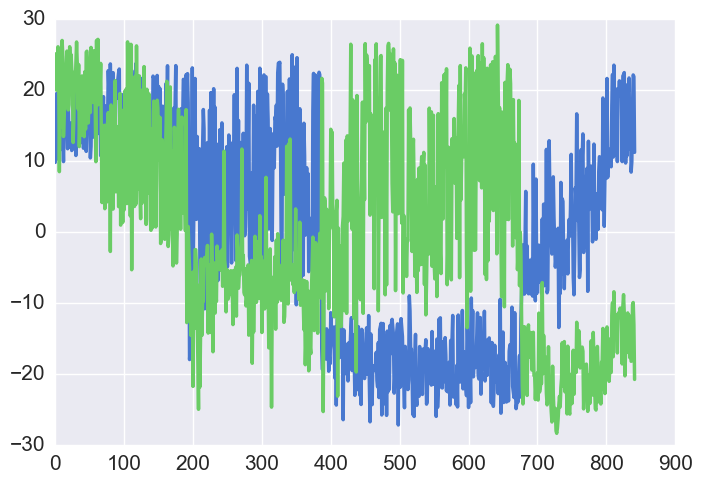

In [42]:
plt.plot(med_proj1)

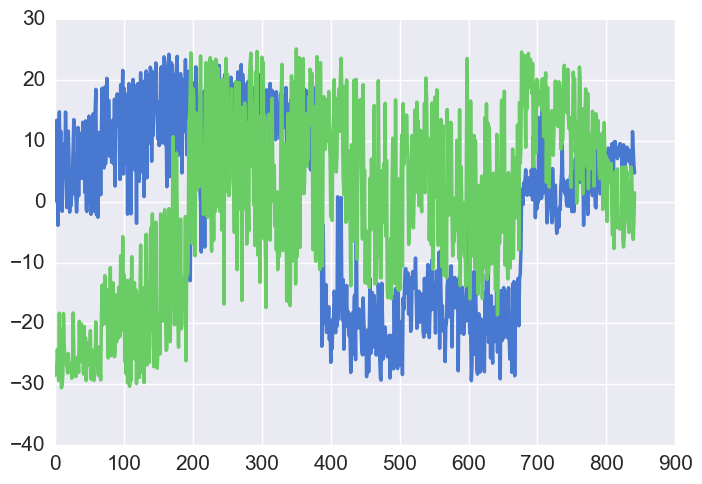

In [40]:
plt.plot(med_proj1)

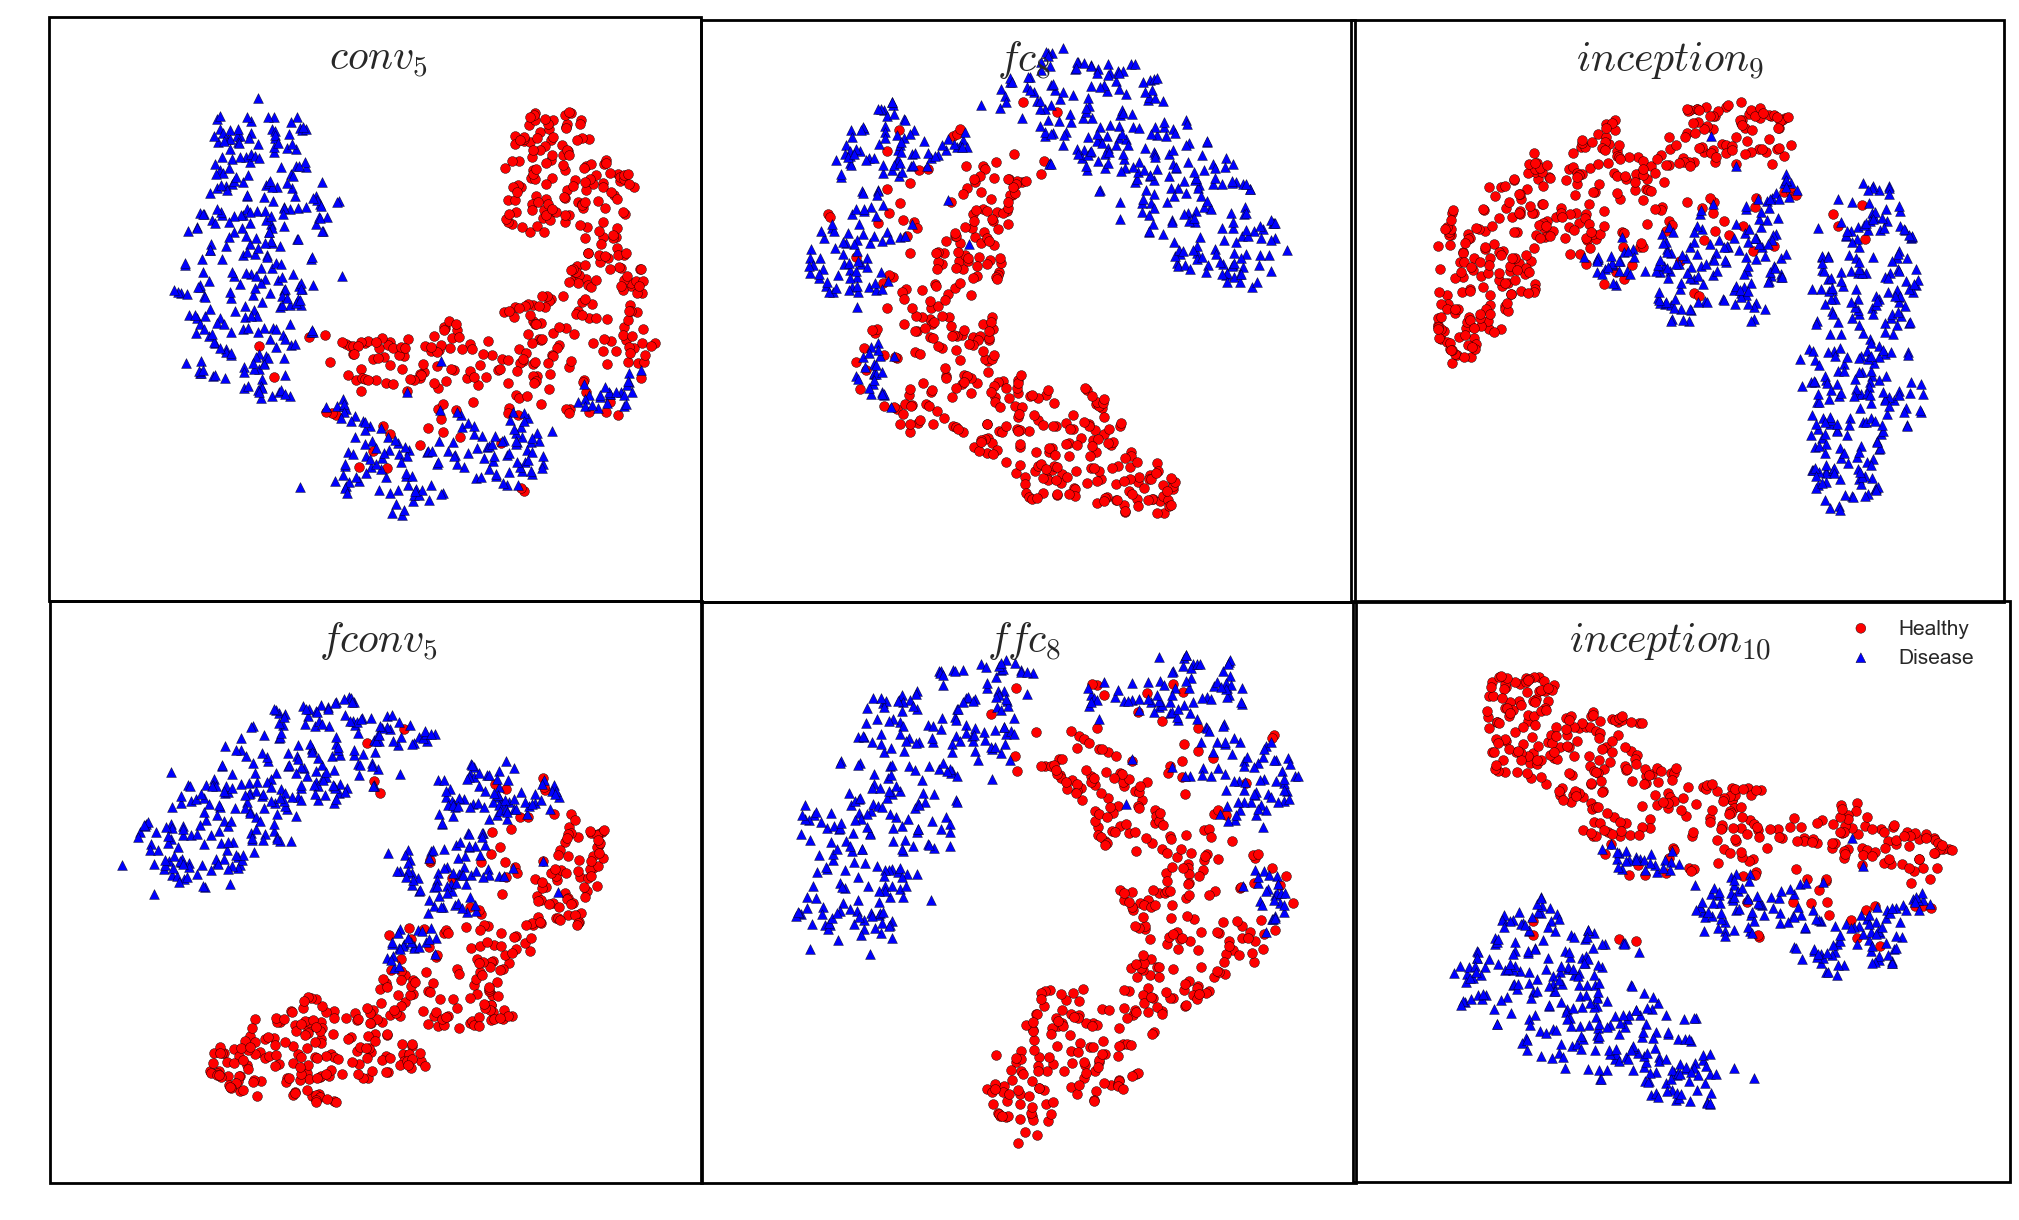

In [43]:
"""
med_proj1:conv5
med_proj2:fc8
med_proj3:mix9
med_proj4:fconv5
med_proj5:ffc8
med_proj6:mix10

"""

from pylab import Rectangle

f,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(25,15))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0, hspace=0)

ax1.set_aspect('auto')
scatter_new(med_proj1, Y, ax1)
ax1.axis('tight')
ax1.axis('off')
ax1.axis('auto')
ax1.set_title("$conv_5$")
tt1 = ax1.title
tt1.set_position([0.5, 0.9])
tt1.set_size(30)
autoAxis = ax1.axis()
rec = Rectangle((autoAxis[0]-0.7,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+0.7,(autoAxis[3]-autoAxis[2])+0.4,fill=False,lw=2)
rec = ax1.add_patch(rec)
rec.set_clip_on(False)

ax2.set_aspect('auto')
scatter_new(med_proj2, Y, ax2)
ax2.axis('tight')
ax2.axis('off')
ax2.axis('auto')
ax2.set_title("$fc_8$")
tt2 = ax2.title
tt2.set_position([0.5, 0.9])
tt2.set_size(30)
autoAxis = ax2.axis()
rec = Rectangle((autoAxis[0]-0,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0,fill=False,lw=2)
rec = ax2.add_patch(rec)
rec.set_clip_on(False)

ax3.set_aspect('auto')
scatter_new(med_proj3, Y, ax3)
ax3.axis('tight')
ax3.axis('off')
ax3.axis('auto')
ax3.set_title("$inception_9$")
tt3 = ax3.title
tt3.set_position([0.5, 0.9])
tt3.set_size(30)
autoAxis = ax3.axis()
rec = Rectangle((autoAxis[0]+0.6,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0,fill=False,lw=2)
rec = ax3.add_patch(rec)
rec.set_clip_on(False)

ax4.set_aspect('auto')
scatter_new(med_proj4, Y, ax4)
ax4.axis('tight')
ax4.axis('off')
ax4.axis('auto')
ax4.set_title("$fconv_5$")
tt4 = ax4.title
tt4.set_position([0.5, 0.9])
tt4.set_size(30)
autoAxis = ax4.axis()
rec = Rectangle((autoAxis[0]-0.6,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+0.7,(autoAxis[3]-autoAxis[2])+0,fill=False,lw=2)
rec = ax4.add_patch(rec)
rec.set_clip_on(False)

ax5.set_aspect('auto')
scatter_new(med_proj5, Y, ax5)
ax5.axis('tight')
ax5.axis('off')
ax5.axis('auto')
ax5.set_title("$ffc_8$")
tt5 = ax5.title
tt5.set_position([0.5, 0.9])
tt5.set_size(30)
autoAxis = ax5.axis()
rec = Rectangle((autoAxis[0],autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0,fill=False,lw=2)
rec = ax5.add_patch(rec)
rec.set_clip_on(False)

ax6.set_aspect('auto')
scatter_new(med_proj6, Y, ax6)
ax6.axis('tight')
ax6.axis('off')
ax6.axis('auto')
ax6.set_title("$inception_{10}$")
tt6 = ax6.title
tt6.set_position([0.5, 0.9])
tt6.set_size(30)
autoAxis = ax6.axis()
rec = Rectangle((autoAxis[0]+0.6,autoAxis[2]-0.2),(autoAxis[1]-autoAxis[0])+1,(autoAxis[3]-autoAxis[2])+0.,fill=False,lw=2)
rec = ax6.add_patch(rec)
rec.set_clip_on(False)

# f.savefig("/Users/Bato/Dropbox/spie-journal-papers-latex/TSNE_compare.eps", format="eps",dpi=1000)

Preprocessing the data using PCA...


(-30.0, 30.0, -40.0, 40.0)

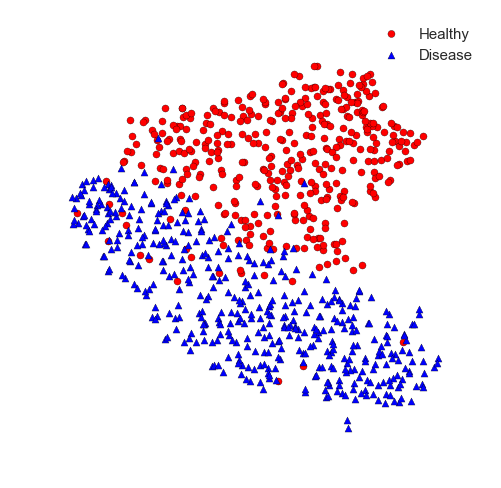

In [31]:
plt.figure(figsize=(8,8))
pal=sns.light_palette("blue", as_cmap=True)

X = np.loadtxt(path_list[5],delimiter=',')
Y = np.loadtxt('/Volumes/JetDrive/dataset/RESULT/CaffeNet/Off_the_shell/PCI_CT/fc8/states.txt')
# Pairwise distances between all data points.
D = pairwise_distances(X, squared=True)
# Similarity with constant sigma.
P_constant = _joint_probabilities_constant_sigma(D, .002)
# Similarity with variable sigma.
P_binary = _joint_probabilities(D, 30., False)
# The output of this function needs to be reshaped to a square matrix.
P_binary_s = squareform(P_binary)

X = pca(X,50).real
med_proj6 = TSNE(perplexity=20,n_iter=700,method='exact',early_exaggeration=4).fit_transform(X)

scatter_new(med_proj6, Y,plt)
plt.axis("off")
plt.axis("equal")
plt.axis("auto")
# ax1.savefig("/Volumes/JetDrive/dataset/RESULT/inception-v3/mix10/mix10_TSNE_2class.eps", format="eps", dpi=1000)

(-60.0, 60.0, -60.0, 60.0)

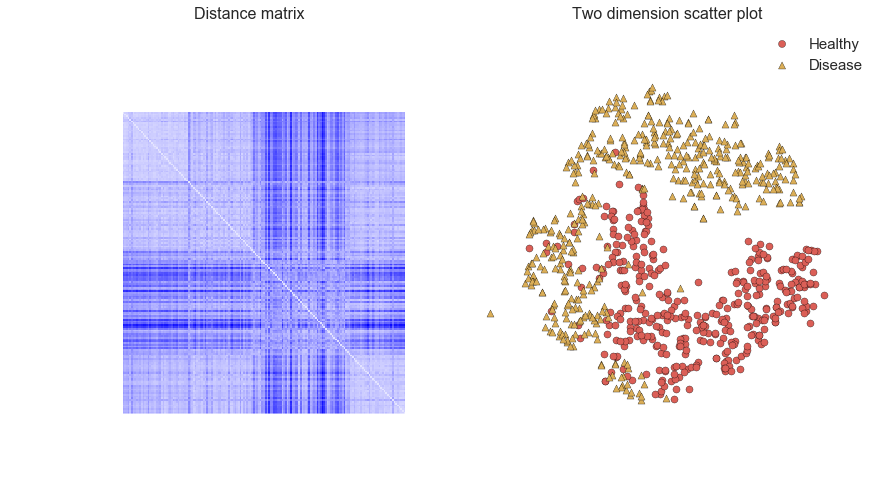

In [89]:

f,(ax1,ax2) = plt.subplots(1,2,figsize=(15,8))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0, hspace=None)

pal = sns.light_palette("blue", as_cmap=True)

ax1.imshow(D[::5,::5], interpolation='none', cmap=pal)
ax1.axis('off')
ax1.set_title("Distance matrix", fontdict={'fontsize': 16})
ax1.axis('auto')

ax2.set_aspect('auto')
scatter_new(med_proj1, Y)
ax2.set_title("Two dimension scatter plot", fontdict={'fontsize': 16})
ax2.axis('tight')
ax2.axis('off')
ax2.axis('auto')

# plt.savefig('/Users/Bato/Dropbox/tsne_python_5.25/Feature/inception3/off-the-shelf/mix8/mix8_TSNE.png')

##Generate Plots of all inception layers

In [31]:
inception_path_list = ["/Volumes/ANAS_DRIVE2/PCI_CIT/RESULT/inception-v3/mix1/mix2.csv",
            "/Volumes/ANAS_DRIVE2/PCI_CIT/RESULT/inception-v3/mix2/mix2.csv",
            "/Volumes/ANAS_DRIVE2/PCI_CIT/RESULT/inception-v3/mix3/mix3.csv",
            "/Volumes/ANAS_DRIVE2/PCI_CIT/RESULT/inception-v3/mix4/mix4.csv",
            "/Volumes/ANAS_DRIVE2/PCI_CIT/RESULT/inception-v3/mix5/mix5.csv",
            "/Volumes/ANAS_DRIVE2/PCI_CIT/RESULT/inception-v3/mix6/mix6.csv",
                       "/Volumes/ANAS_DRIVE2/PCI_CIT/RESULT/inception-v3/mix7/mix7.csv",
                       "/Volumes/ANAS_DRIVE2/PCI_CIT/RESULT/inception-v3/mix8/mix8.csv",
                       "/Volumes/ANAS_DRIVE2/PCI_CIT/RESULT/inception-v3/mix9/mix9.csv",
            "/Volumes/ANAS_DRIVE2/PCI_CIT/RESULT/inception-v3/mix10/mix10.csv"]

In [34]:
for i in range(0,len(inception_path_list)):
    X = np.loadtxt(inception_path_list[i],delimiter=',')
    Y = np.loadtxt('/Volumes/ANAS_DRIVE2/PCI_CIT/RESULT/CaffeNet/Off_the_shell/PCI_CT/fc8/states.txt')
    # Pairwise distances between all data points.
    D = pairwise_distances(X, squared=True)
    # Similarity with constant sigma.
    P_constant = _joint_probabilities_constant_sigma(D, .002)
    # Similarity with variable sigma.
    P_binary = _joint_probabilities(D, 30., False)
    # The output of this function needs to be reshaped to a square matrix.
    P_binary_s = squareform(P_binary)
    X = pca(X,50).real
    
    if i ==0:
        med_proj1 = TSNE(perplexity=20,n_iter=700,method='exact',early_exaggeration=4).fit_transform(X)
    elif i == 1:
        med_proj2 = TSNE(perplexity=20,n_iter=700,method='exact',early_exaggeration=4).fit_transform(X)
    elif i == 2:
        med_proj3 = TSNE(perplexity=20,n_iter=700,method='exact',early_exaggeration=4).fit_transform(X)
    elif i ==3:
        med_proj4 = TSNE(perplexity=20,n_iter=700,method='exact',early_exaggeration=4).fit_transform(X)
    elif i ==4:
        med_proj5 = TSNE(perplexity=20,n_iter=700,method='exact',early_exaggeration=4).fit_transform(X)
    elif i == 5:
        med_proj6 = TSNE(perplexity=20,n_iter=700,method='exact',early_exaggeration=4).fit_transform(X)

/Volumes/ANAS_DRIVE2/PCI_CIT/RESULT/CaffeNet/Off_the_shell/PCI_CT/conv5/CaffeNet_conv5_256.csv
/Volumes/ANAS_DRIVE2/PCI_CIT/RESULT/CaffeNet/Off_the_shell/PCI_CT/fc8/CaffeNet_fc8_1000.csv
/Volumes/ANAS_DRIVE2/PCI_CIT/RESULT/inception-v3/mix9/mix9.csv
/Volumes/ANAS_DRIVE2/PCI_CIT/RESULT/CaffeNet/Off_the_shell/tune-PCI-CT/conv5/conv5.csv
/Volumes/ANAS_DRIVE2/PCI_CIT/RESULT/CaffeNet/Off_the_shell/PCI_CT/fc6/CaffeNet_fc6_4096.csv
/Volumes/ANAS_DRIVE2/PCI_CIT/RESULT/inception-v3/mix10/mix10.csv
